# Step 1: Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import keras

2024-11-04 23:39:29.037043: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 23:39:29.037882: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 23:39:29.040132: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-04 23:39:29.046372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730743769.056844   27393 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730743769.05

# Step 2: Load the Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#normalize the data (max of 0-255 ,so divide by 255)
x_train=x_train/255
x_test=x_test/255

In [3]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

# Step 3: Define the network Architecture

In [6]:
model=Sequential() #Sequential as a feed forward network
model.add(keras.layers.Flatten(input_shape=(28,28)))  #Flatten the input(i.e. convett to 1-D array) and provide the input size to the input layer
model.add(keras.layers.Dense(256,activation='relu'))  #Define the hidden layer with 128 nodes (<than 28x28) with Relu as activation function
model.add(keras.layers.Dense(10,activation='softmax'))#Define the output layer with 10 nodes (number of classes=10) with softmax activation function

/home/mayur/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-11-04 23:39:30.685682: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


# Step 4: Train the Model

In [7]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #Compile the model using the SGD optimizer and metric accuracy
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10) #Fit the model for the training set and also providing the validation set and number of epochs

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step - accuracy: 0.7575 - loss: 0.9780 - val_accuracy: 0.9025 - val_loss: 0.3484
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 830us/step - accuracy: 0.9057 - loss: 0.3386 - val_accuracy: 0.9228 - val_loss: 0.2842
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.9183 - loss: 0.2890 - val_accuracy: 0.9300 - val_loss: 0.2527
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.9287 - loss: 0.2546 - val_accuracy: 0.9341 - val_loss: 0.2329
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.9342 - loss: 0.2348 - val_accuracy: 0.9398 - val_loss: 0.2142
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.9401 - loss: 0.2128 - val_accuracy: 0.9436 - val_loss: 0.1992
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.9453 - loss: 0.1992 - val_accuracy: 0.9480 - val_loss: 0.1863
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9494 -

# Step 5: Evaluate the model

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test) #evaluate the modelfor the test set
#Print the accuracy and the loss of the model
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9504 - loss: 0.1811
Loss=0.154
Accuracy=0.957


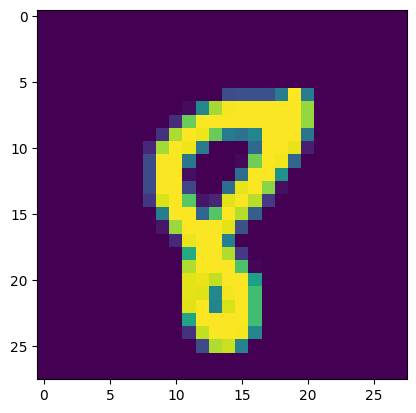

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step
Digit is :  8


In [9]:
#Randomly choose any image from the test test and evaluate the predict of the model
import random
n=random.randint(0,9999) # choose random number between 0-9999
plt.imshow(x_test[n]) #display that image
plt.show()
pred=model.predict(x_test) #predict the output using the model
print("Digit is : " ,np.argmax(pred[n])) # print output

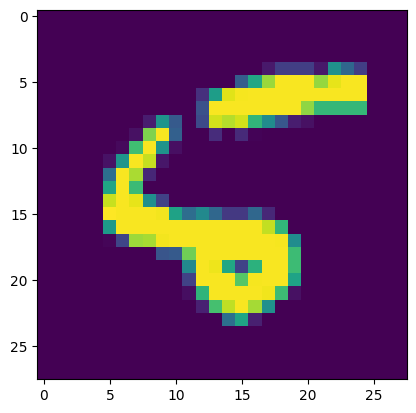

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step
Digit is :  6


In [10]:
plt.imshow(x_test[8]) #display that image
plt.show()
pred=model.predict(x_test) #predict the output using the model
print("Digit is : " ,np.argmax(pred[8])) # print output

# Step 6: Plot the accuracy and loss Graphs

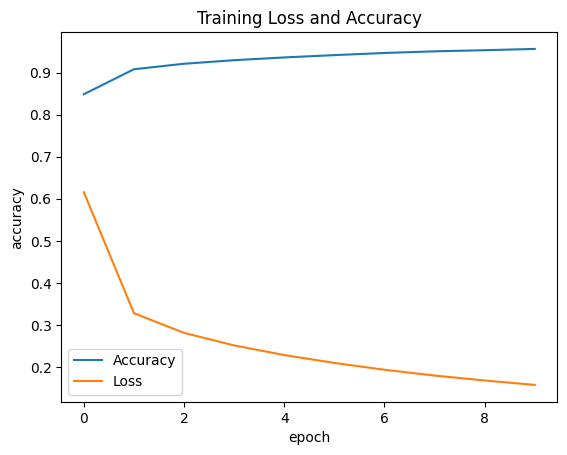

In [11]:
plt.plot(H.history['accuracy']) #get the accuracy for the training set from the model's history attribute
plt.plot(H.history['loss'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])

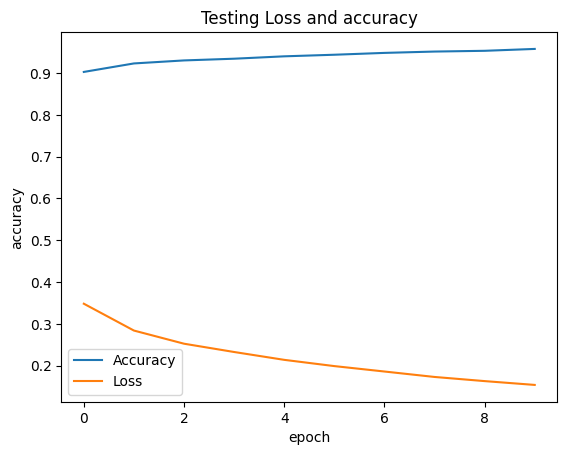

In [12]:
plt.plot(H.history['val_accuracy']) #get the accuracy for the validation set from the model's history attribute
plt.plot(H.history['val_loss']) #get the loss for the validation set from the model's history attribute
plt.title('Testing Loss and accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])